In [140]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error, accuracy_score
import matplotlib.pyplot as plt

In [152]:
#load the datasets
teen_data = pd.read_csv(rf"C:\Users\Wahaj Sajid\Desktop\Datasets\teen_phone_addiction_dataset.csv")

In [177]:
teen_data

,ID,Name,Age,Gender,Location,School_Grade,Daily_Usage_Hours,Sleep_Hours,Academic_Performance,Social_Interactions,Exercise_Hours,Anxiety_Level,Depression_Level,Self_Esteem,Parental_Control,Screen_Time_Before_Bed,Phone_Checks_Per_Day,Apps_Used_Daily,Time_on_Social_Media,Time_on_Gaming,Time_on_Education,Phone_Usage_Purpose,Family_Communication,Weekend_Usage_Hours,Addiction_Level
0,1,Shannon Francis,13,Female,Hansonfort,9th,4.0,6.1,78,5,0.1,10,3,8,0,1.4,86,19,3.6,1.7,1.2,Browsing,4,8.7,10.0
1,2,Scott Rodriguez,17,Female,Theodorefort,7th,5.5,6.5,70,5,0.0,3,7,3,0,0.9,96,9,1.1,4.0,1.8,Browsing,2,5.3,10.0
2,3,Adrian Knox,13,Other,Lindseystad,11th,5.8,5.5,93,8,0.8,2,3,10,0,0.5,137,8,0.3,1.5,0.4,Education,6,5.7,9.2
3,4,Brittany Hamilton,18,Female,West Anthony,12th,3.1,3.9,78,8,1.6,9,10,3,0,1.4,128,7,3.1,1.6,0.8,Social Media,8,3.0,9.8
4,5,Steven Smith,14,Other,Port Lindsaystad,9th,2.5,6.7,56,4,1.1,1,5,1,0,1.0,96,20,2.6,0.9,1.1,Gaming,10,3.7,8.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2996,Jesus Yates,16,Female,New Jennifer,12th,3.9,6.4,53,4,0.9,7,10,2,1,0.3,80,15,2.7,1.8,1.0,Other,8,9.4,9.8
2996,2997,Bethany Murray,13,Female,Richardport,8th,3.6,7.3,93,5,0.0,8,8,9,1,0.9,45,8,3.1,0.0,0.3,Gaming,9,5.2,5.5
2997,2998,Norman Hughes,14,Other,Rebeccaton,7th,3.2,6.5,98,1,0.0,4,3,9,0,0.2,51,13,2.4,0.2,2.4,Social Media,9,5.9,6.2
2998,2999,Barbara Hinton,17,Female,Ramirezmouth,9th,6.7,7.5,67,3,0.2,3,5,9,0,1.6,125,17,1.7,2.6,1.5,Browsing,4,6.1,10.0


In [154]:
teen_data_refined = teen_data[['Age', 'Gender', 'Daily_Usage_Hours', 'Sleep_Hours', 'Screen_Time_Before_Bed', 'Phone_Checks_Per_Day', 'Apps_Used_Daily', 'Time_on_Social_Media', 'Time_on_Gaming', 'Time_on_Education', 'Phone_Usage_Purpose', 'Addiction_Level']].copy()

In [159]:
teen_data_refined.head()

,Age,Gender,Daily_Usage_Hours,Sleep_Hours,Screen_Time_Before_Bed,Phone_Checks_Per_Day,Apps_Used_Daily,Time_on_Social_Media,Time_on_Gaming,Time_on_Education,Phone_Usage_Purpose,Addiction_Level
0,13,0,4.0,6.1,1.4,86,19,3.6,1.7,1.2,0,0.694761
1,17,0,5.5,6.5,0.9,96,9,1.1,4.0,1.8,0,0.694761
2,13,2,5.8,5.5,0.5,137,8,0.3,1.5,0.4,1,0.197660
3,18,0,3.1,3.9,1.4,128,7,3.1,1.6,0.8,4,0.570486
4,14,2,2.5,6.7,1.0,96,20,2.6,0.9,1.1,2,-0.175166


In [156]:
#encode the Phone_Usage_Purpose column
usage_purpose_encoder = LabelEncoder()
gender_encoder = LabelEncoder()
teen_data_refined['Phone_Usage_Purpose'] = usage_purpose_encoder.fit_transform(teen_data_refined['Phone_Usage_Purpose'])
teen_data_refined['Gender'] = gender_encoder.fit_transform(teen_data_refined['Gender'])

In [158]:
#scaling y target data
y_scaler = StandardScaler()
teen_data_refined['Addiction_Level'] = y_scaler.fit_transform(teen_data_refined[['Addiction_Level']])


In [160]:
#defining x and y
x = teen_data_refined.drop(columns=['Addiction_Level'], axis=1)
y = teen_data_refined['Addiction_Level']

In [161]:
#scaling the data
x_scaler = StandardScaler()
x = x_scaler.fit_transform(x)

In [162]:
#train test split the model
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [163]:
#train the model
model = SGDRegressor(max_iter=1000, learning_rate='invscaling', eta0=0.01, random_state=42)
model.fit(x_train, y_train)

SGDRegressor(random_state=42)

In [176]:
#predict the model 
age = 13
gender = 'Female'
daily_usage_hours = 4.0
sleep_hours = 6.1
screen_time_before_bed = 1.4
phone_checks_per_day = 86
apps_used_daily = 19
time_on_social_media = 3.6
time_on_gaming = 1.7
time_on_education = 1.2
phone_usage_purpose = 'Browsing'


#encode the features
gender = gender_encoder.transform([gender])[0]
phone_usage_purpose = usage_purpose_encoder.transform([phone_usage_purpose])[0]


input_features = [[age, gender, daily_usage_hours, sleep_hours, screen_time_before_bed,phone_checks_per_day,apps_used_daily,time_on_social_media,time_on_gaming,time_on_education,phone_usage_purpose]]

#scale the input features
input_features = x_scaler.transform(input_features)

#making prediction
prediction = model.predict(input_features)

#inverse transforming the predicted outcome
inverse_predict = y_scaler.inverse_transform([prediction])

print(inverse_predict)

if(inverse_predict >=0.0 and inverse_predict <=2.5):
    print("Very Low Phone Addiction")
elif(inverse_predict >=2.5 and inverse_predict <=5.0):
    print("Low Phone Addiction")
elif(inverse_predict>=5.0 and inverse_predict <=7.5):
    print("Moderate Phone Addiction")
elif(inverse_predict >=7.5 and inverse_predict <=10):
    print("High Phone Addiction")



[[9.72191317]]
High Phone Addiction


c:\Users\Wahaj Sajid\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Mean squared error:  0.2563887226339021


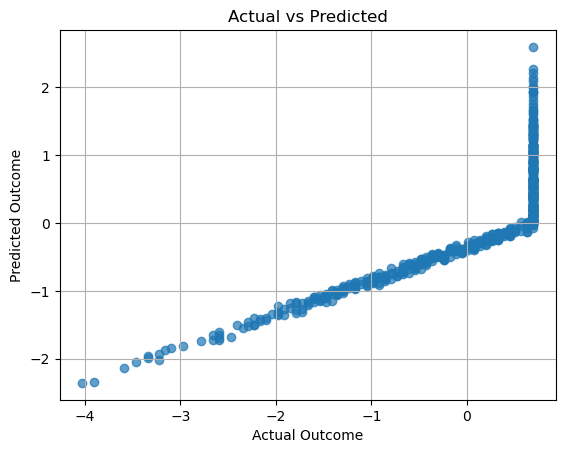

In [168]:
#test the model on testing set
test_predict = model.predict(x_test)
test_mse = mean_squared_error(y_test, test_predict)
print("Mean squared error: ",test_mse)

#plot the difference
plt.scatter(y_test, test_predict, alpha=0.7)
plt.xlabel("Actual Outcome")
plt.ylabel("Predicted Outcome")
plt.title("Actual vs Predicted")
plt.grid(True)
plt.show()

Mean squaured error:  0.26213035315418765


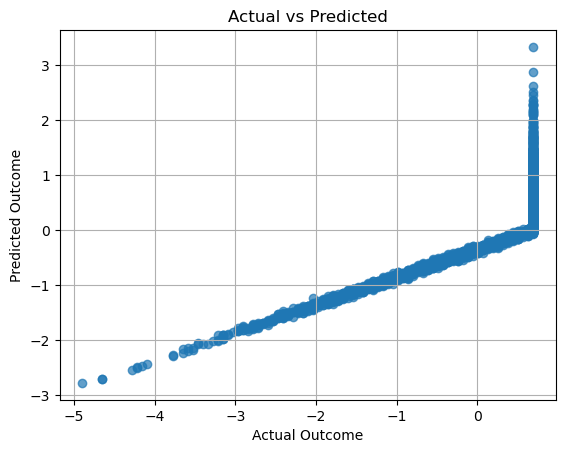

In [170]:
#test the model on training set
train_predict = model.predict(x_train)
train_mse = mean_squared_error(y_train, train_predict)
print("Mean squaured error: ",train_mse)


#plot the differece
plt.scatter(y_train, train_predict, alpha=0.7)
plt.xlabel('Actual Outcome')
plt.ylabel('Predicted Outcome')
plt.title("Actual vs Predicted")
plt.grid(True)
plt.show()